In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
iris.feature_names[:5]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [7]:
iris.target_names[:]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X = iris.data[:,:4]
y = iris.target

X_sepal_length = X[:,0] 
X_sepal_width = X[:,1]
X_petal_length = X[:,2]
X_petal_width = X[:,3]

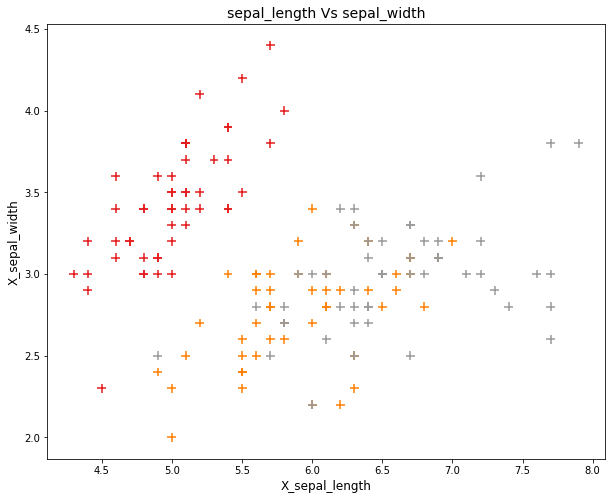

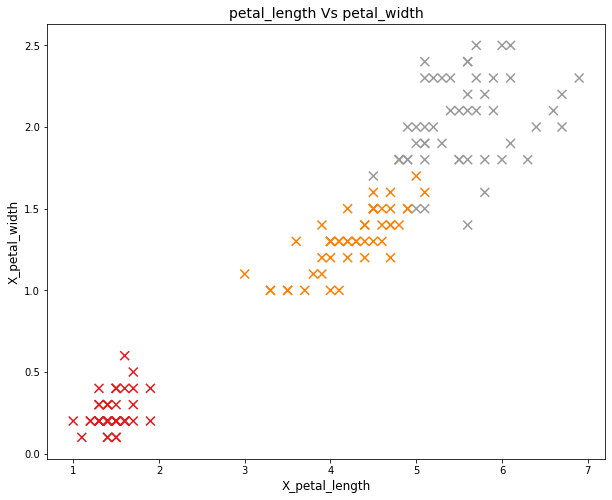

In [9]:
plt.figure(1, figsize=(10,8))
plt.title("sepal_length Vs sepal_width", fontsize = 14)
plt.xlabel('X_sepal_length', fontsize=12)
plt.ylabel('X_sepal_width', fontsize=12)
plt.scatter(X_sepal_length,X_sepal_width, marker='+', c=y, s=80, cmap=plt.cm.Set1)

plt.figure(2, figsize=(10,8))
plt.title("petal_length Vs petal_width", fontsize = 14)
plt.xlabel('X_petal_length', fontsize=12)
plt.ylabel('X_petal_width', fontsize=12)
plt.scatter(X_petal_length,X_petal_width, marker='x', c=y, s=80, cmap=plt.cm.Set1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=10)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
model.score(X_test, y_test)

0.9473684210526315

In [16]:
y_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, y_test)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 12]], dtype=int64)

Text(33.0, 0.5, 'y-predicted (predicted value)')

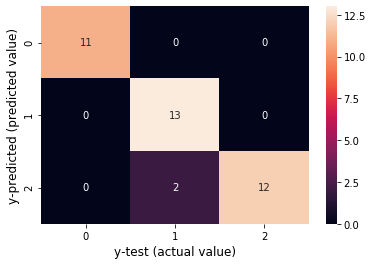

In [18]:
import seaborn as sns

sns.heatmap(cm, annot=True)
plt.xlabel('y-test (actual value)', fontsize=12)
plt.ylabel('y-predicted (predicted value)', fontsize=12)

In [19]:
X_test = pd.DataFrame(X_test)
X_test.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
X_test.head()


,sepal length,sepal width,petal length,petal width
0,6.3,2.3,4.4,1.3
1,6.4,2.7,5.3,1.9
2,5.4,3.7,1.5,0.2
3,6.1,3.0,4.6,1.4
4,5.0,3.3,1.4,0.2


In [20]:
predicted = pd.DataFrame(model.predict(X_test))
predicted.columns = ['predicted']
predicted.head()

,predicted
0,1
1,2
2,0
3,1
4,0


In [21]:
df = pd.concat([X_test, predicted], axis='columns')
df.tail()

,sepal length,sepal width,petal length,petal width,predicted
33,5.8,2.8,5.1,2.4,2
34,6.3,2.5,5.0,1.9,2
35,4.6,3.2,1.4,0.2,0
36,6.7,3.3,5.7,2.1,2
37,6.9,3.2,5.7,2.3,2


In [22]:
def flower():
    f = []
    for i in range(38):
        if df.predicted[i]==0:
            f.append('setosa')
        elif df.predicted[i]==1:
            f.append('versicolor')
        else:
            f.append('verginica')
    return f

flower = pd.DataFrame(flower())

In [23]:
flower.columns = ['target_names']


In [24]:
output = pd.concat([df, flower], axis='columns')

In [25]:
output

,sepal length,sepal width,petal length,petal width,predicted,target_names
0,6.3,2.3,4.4,1.3,1,versicolor
1,6.4,2.7,5.3,1.9,2,verginica
2,5.4,3.7,1.5,0.2,0,setosa
3,6.1,3.0,4.6,1.4,1,versicolor
4,5.0,3.3,1.4,0.2,0,setosa
5,5.0,2.0,3.5,1.0,1,versicolor
6,6.3,2.5,4.9,1.5,1,versicolor
7,5.8,2.7,4.1,1.0,1,versicolor
8,5.1,3.4,1.5,0.2,0,setosa
9,5.7,2.8,4.5,1.3,1,versicolor
